In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
data = pd.read_csv('tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
# 'size' represents the feature, while 'tip' is the target we're predicting
# Defining features (independent variable) and target (dependent variable)
features = data[['size']].values  # The 'size' feature as input
target = data['tip'].values       # The 'tip' target we're aiming to predict

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:
# Initialize and train the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_values = linear_regression_model.predict(X_test)

# Evaluate model performance using R-squared
r2 = r2_score(y_test, predicted_values)
print('R-squared score for Linear Regression:', r2)


R-squared score for Linear Regression: 0.10485555837504112


In [36]:
# Initialize and train the Ridge regression model with regularization parameter alpha=1.0
ridge_regression_model = Ridge(alpha=2.0)
ridge_regression_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_regression_model.predict(X_test)

# Evaluate model performance using R-squared
ridge_r2_score = r2_score(y_test, ridge_predictions)
print('R-squared score for Ridge Regression:', ridge_r2_score)


R-squared score for Ridge Regression: 0.10677658941002288


In [37]:
# Initialize and train the Lasso regression model with regularization parameter alpha=0.01
lasso_regression_model = Lasso(alpha=0.02)
lasso_regression_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_regression_model.predict(X_test)

# Evaluate model performance using R-squared
lasso_r2_score = r2_score(y_test, lasso_predictions)
print('R-squared score for Lasso Regression:', lasso_r2_score)


R-squared score for Lasso Regression: 0.10969364518445612


In [40]:
# Initialize and train the Decision Tree regression model with a random state for reproducibility
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = decision_tree_model.predict(X_test)

# Evaluate model performance using R-squared
tree_r2_score = r2_score(y_test, tree_predictions)
print('R-squared score for Decision Tree Regression:', tree_r2_score)


R-squared score for Decision Tree Regression: 0.030496330244904835


In [43]:
# Initialize the Random Forest regression model
# Using 1000 trees (n_estimators=100) and a random state for reproducibility
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=0)

# Step 2: Train the model using the training data
random_forest_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
forest_predictions = random_forest_model.predict(X_test)

# Step 4: Evaluate the model's performance using the R-squared metric
forest_r2_score = r2_score(y_test, forest_predictions)
print('R-squared score for Random Forest Regression:', forest_r2_score)

R-squared score for Random Forest Regression: 0.029898578158471745


In [22]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Step 1: Initialize scalers for feature scaling
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Step 2: Scale the training and testing features
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Step 3: Scale the training target values and flatten to fit the model
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

# Step 4: Initialize and train the Support Vector Regressor (SVR) with an RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# Step 5: Make predictions on the scaled test features
y_pred_scaled = svr_model.predict(X_test_scaled)

# Step 6: Inverse transform the predictions to get them back to the original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 7: Evaluate the model's performance using the R-squared metric
svr_r2_score = r2_score(y_test, y_pred)
print('R-squared score for SVR:', svr_r2_score)


R-squared score for SVR: 0.20136869923904366


In [46]:

#  Initialize the K-Nearest Neighbors regressor
# Using 5 neighbors to make predictions
knn_model = KNeighborsRegressor(n_neighbors=6)

# Step 2: Train the model using the training data
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Step 4: Evaluate the model's performance using the R-squared metric
knn_r2_score = r2_score(y_test, knn_predictions)
print('R-squared score for K-Nearest Neighbors Regression:', knn_r2_score)


R-squared score for K-Nearest Neighbors Regression: -0.5316458594147304


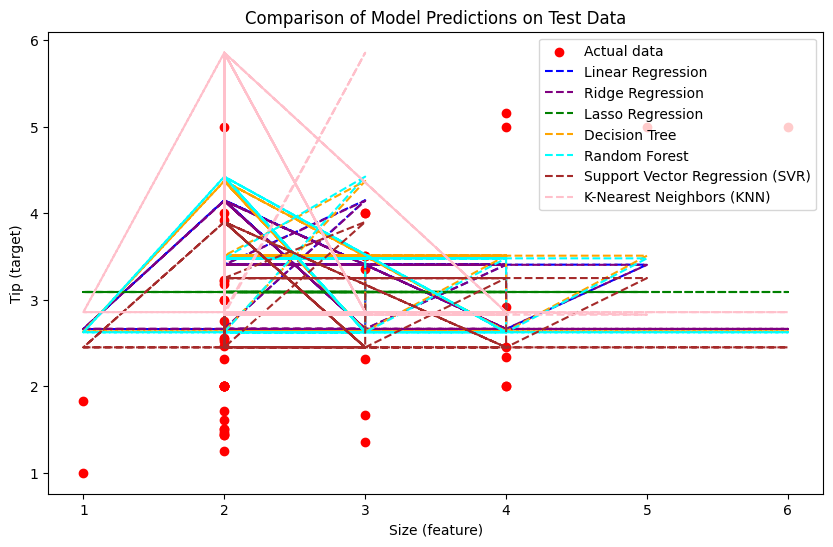

In [47]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Step 2: Scatter plot for actual test data
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual data') # Extract the first column of X_test

# Step 3: Line plots for each model's predictions on the test set
# Assuming y_pred_linear, y_pred_ridge, etc. are predictions for the entire dataset
# We need to slice them to match the size of X_test
plt.plot(X_test[:, 0], y_pred_linear[:len(X_test)], color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_ridge[:len(X_test)], color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_lasso[:len(X_test)], color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_tree[:len(X_test)], color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test[:, 0], y_pred_forest[:len(X_test)], color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test[:, 0], y_pred_svr[:len(X_test)], color='brown', label='Support Vector Regression (SVR)', linestyle='--')
plt.plot(X_test[:, 0], y_pred_knn[:len(X_test)], color='pink', label='K-Nearest Neighbors (KNN)', linestyle='--')

# Step 4: Customize plot with title, axis labels, and legend
plt.title('Comparison of Model Predictions on Test Data')
plt.xlabel('Size (feature)')
plt.ylabel('Tip (target)')
plt.legend()

# Step 5: Display the plot
plt.show()

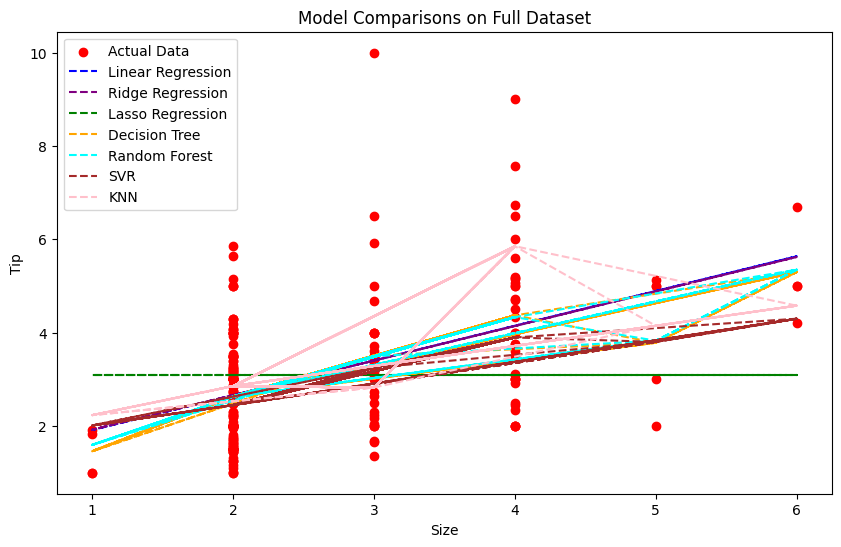

In [48]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Import Ridge instead of RidgeRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR #Make sure to import SVR

# Create model instances
linear_reg = LinearRegression()
ridge_reg = Ridge()  # Use Ridge instead of RidgeRegression
lasso_reg = Lasso()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()
svr_reg = SVR()
knn_reg = KNeighborsRegressor()

# Scale the features for SVR - ONLY SCALE TRAINING DATA
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train) # Scale only X_train
X_test_scaled = sc_X.transform(X_test) #Scale X_test using the same scaler


# Train the models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train) # Fit using scaled training data
knn_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)
y_pred_svr = svr_reg.predict(X_scaled)  # Predict on scaled data - check this to ensure its correct
y_pred_knn = knn_reg.predict(X)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')
plt.title('Model Comparisons on Full Dataset')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.legend()
plt.show()

In [55]:
# 'total_bill' represents the feature, while 'tip' is the target we're predicting
# Defining features (independent variable) and target (dependent variable)
features = data[['total_bill']].values  # The 'total_bill' feature as input
target = data['tip'].values       # The 'tip' target we're aiming to predict

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [56]:
# Initialize and train the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_values = linear_regression_model.predict(X_test)

# Evaluate model performance using R-squared
r2 = r2_score(y_test, predicted_values)
print('R-squared score for Linear Regression:', r2)
# Initialize and train the Ridge regression model with regularization parameter alpha=1.0
ridge_regression_model = Ridge(alpha=2.0)
ridge_regression_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_regression_model.predict(X_test)

# Evaluate model performance using R-squared
ridge_r2_score = r2_score(y_test, ridge_predictions)
print('R-squared score for Ridge Regression:', ridge_r2_score)
# Initialize and train the Lasso regression model with regularization parameter alpha=0.01
lasso_regression_model = Lasso(alpha=0.02)
lasso_regression_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_regression_model.predict(X_test)

# Evaluate model performance using R-squared
lasso_r2_score = r2_score(y_test, lasso_predictions)
print('R-squared score for Lasso Regression:', lasso_r2_score)
# Initialize and train the Decision Tree regression model with a random state for reproducibility
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = decision_tree_model.predict(X_test)

# Evaluate model performance using R-squared
tree_r2_score = r2_score(y_test, tree_predictions)
print('R-squared score for Decision Tree Regression:', tree_r2_score)
# Initialize and train the Decision Tree regression model with a random state for reproducibility
decision_tree_model = DecisionTreeRegressor(random_state=1)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = decision_tree_model.predict(X_test)

# Evaluate model performance using R-squared
tree_r2_score = r2_score(y_test, tree_predictions)
print('R-squared score for Decision Tree Regression:', tree_r2_score)
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Step 1: Initialize scalers for feature scaling
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Step 2: Scale the training and testing features
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Step 3: Scale the training target values and flatten to fit the model
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

# Step 4: Initialize and train the Support Vector Regressor (SVR) with an RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# Step 5: Make predictions on the scaled test features
y_pred_scaled = svr_model.predict(X_test_scaled)

# Step 6: Inverse transform the predictions to get them back to the original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 7: Evaluate the model's performance using the R-squared metric
svr_r2_score = r2_score(y_test, y_pred)
print('R-squared score for SVR:', svr_r2_score)
#  Initialize the K-Nearest Neighbors regressor
# Using 5 neighbors to make predictions
knn_model = KNeighborsRegressor(n_neighbors=6)

# Step 2: Train the model using the training data
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Step 4: Evaluate the model's performance using the R-squared metric
knn_r2_score = r2_score(y_test, knn_predictions)
print('R-squared score for K-Nearest Neighbors Regression:', knn_r2_score)

R-squared score for Linear Regression: 0.5449381659234664
R-squared score for Ridge Regression: 0.5449534941690516
R-squared score for Lasso Regression: 0.545213027051926
R-squared score for Decision Tree Regression: -0.06898287247700985
R-squared score for Decision Tree Regression: -0.06898287247700985
R-squared score for SVR: 0.5218870832760052
R-squared score for K-Nearest Neighbors Regression: 0.47507894188091315


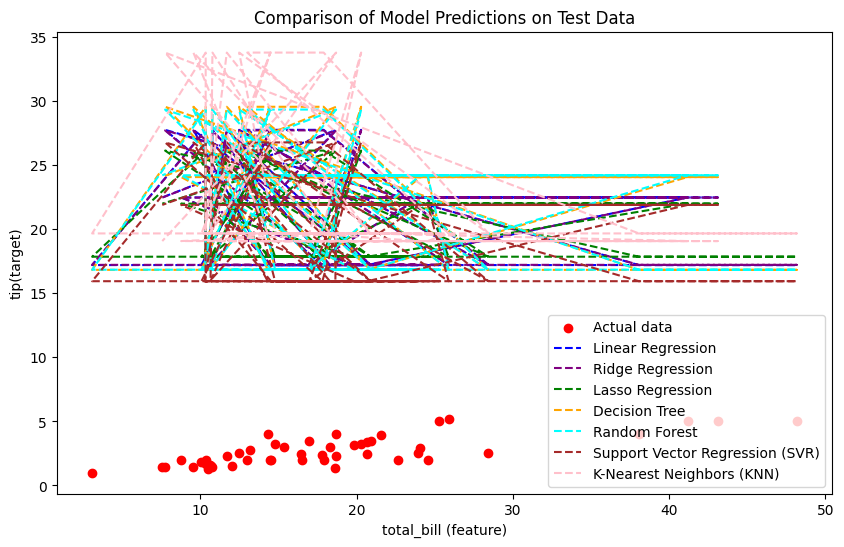

In [57]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Step 2: Scatter plot for actual test data
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual data') # Extract the first column of X_test

# Step 3: Line plots for each model's predictions on the test set
# Assuming y_pred_linear, y_pred_ridge, etc. are predictions for the entire dataset
# We need to slice them to match the size of X_test
plt.plot(X_test[:, 0], y_pred_linear[:len(X_test)], color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_ridge[:len(X_test)], color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_lasso[:len(X_test)], color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_tree[:len(X_test)], color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test[:, 0], y_pred_forest[:len(X_test)], color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test[:, 0], y_pred_svr[:len(X_test)], color='brown', label='Support Vector Regression (SVR)', linestyle='--')
plt.plot(X_test[:, 0], y_pred_knn[:len(X_test)], color='pink', label='K-Nearest Neighbors (KNN)', linestyle='--')

# Step 4: Customize plot with title, axis labels, and legend
plt.title('Comparison of Model Predictions on Test Data')
plt.xlabel('total_bill (feature)')
plt.ylabel('tip(target)')
plt.legend()

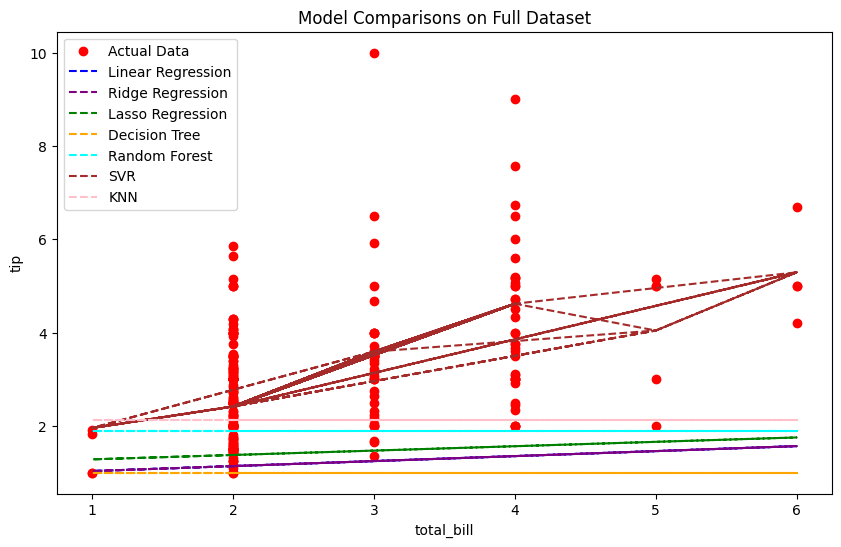

In [58]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Import Ridge instead of RidgeRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR #Make sure to import SVR

# Create model instances
linear_reg = LinearRegression()
ridge_reg = Ridge()  # Use Ridge instead of RidgeRegression
lasso_reg = Lasso()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()
svr_reg = SVR()
knn_reg = KNeighborsRegressor()

# Scale the features for SVR - ONLY SCALE TRAINING DATA
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train) # Scale only X_train
X_test_scaled = sc_X.transform(X_test) #Scale X_test using the same scaler


# Train the models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train_scaled, y_train) # Fit using scaled training data
knn_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X)
y_pred_ridge = ridge_reg.predict(X)
y_pred_lasso = lasso_reg.predict(X)
y_pred_tree = tree_reg.predict(X)
y_pred_forest = forest_reg.predict(X)
y_pred_svr = svr_reg.predict(X_scaled)  # Predict on scaled data - check this to ensure its correct
y_pred_knn = knn_reg.predict(X)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X, y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X, y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X, y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X, y_pred_knn, color='pink', label='KNN', linestyle='--')
plt.title('Model Comparisons on Full Dataset')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.show()